# Data Exploration

In [2]:
import pandas as pd
import numpy as np

train_values = pd.read_csv('train/train_df.csv')
train_signs = pd.read_csv('train/train_meta.csv')
labels = {'autism':1,'control':0}
labels_inv = {1:'autism',0:'control'}

random_state = 42

In [6]:
train_values.describe()

,feat1,feat2,feat3,feat4,feat5,feat6,feat7,feat8,feat9,feat10,...,feat1857,feat1858,feat1859,feat1860,feat1861,feat1862,feat1863,feat1864,feat1865,feat1866
count,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,...,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000
mean,16.622875,21.866266,19.688995,18.449492,21.766771,15.049737,16.677490,18.916106,16.030604,10.150430,...,15.212116,13.180254,9.620701,12.378089,12.147206,12.527977,10.204003,13.491883,11.240604,8.557930
std,0.822726,0.611312,0.284272,0.446658,0.095108,1.422904,0.677536,0.577188,0.874054,0.620695,...,0.845815,1.233018,0.982778,1.337069,1.814396,1.476630,2.762713,1.396043,0.778348,1.698210
min,13.364076,20.542028,18.968309,17.488151,21.447586,11.925737,13.912280,17.405390,12.478572,8.952604,...,12.972007,10.371236,7.452541,7.611373,7.312330,7.890099,6.531108,8.323266,8.366748,6.753923
25%,16.092570,21.363362,19.529074,18.134482,21.718832,14.125456,16.277978,18.571449,15.706372,9.751829,...,14.636505,12.438246,8.981888,11.573749,11.400902,11.767453,7.291213,12.837180,10.718357,7.238925
50%,16.775372,21.895343,19.705776,18.453629,21.779703,15.135014,16.678712,18.912313,16.157614,10.110340,...,15.398257,13.232574,9.696089,12.597885,12.523242,12.734281,10.312755,13.864075,11.270964,7.643021
75%,17.177990,22.354347,19.862149,18.746438,21.841528,16.008331,17.135410,19.294630,16.598174,10.499253,...,15.868094,13.838850,10.321080,13.253796,13.284306,13.370170,12.831150,14.429664,11.808806,9.932692
max,18.603454,23.686176,20.888440,19.681113,21.910207,18.870839,18.342050,20.149437,17.717694,11.914791,...,16.935663,17.209155,12.158398,16.072760,16.626016,16.546124,15.542546,15.667183,12.857477,13.086475


In [10]:
train_signs.diagnosis = np.vectorize(labels.__getitem__)(train_signs.diagnosis.values)

In [ ]:
y_autists = train_values[train_signs.age<20][train_signs.diagnosis=='autism'].describe()
o_autists = train_values[train_signs.age>20][train_signs.diagnosis=='autism'].describe()

y_control = train_values[train_signs.age<20][train_signs.diagnosis=='control'].describe()
o_control = train_values[train_signs.age>20][train_signs.diagnosis=='control'].describe()

# Гипотеза: Пространственная локализация

In [27]:
from sklearn.metrics import pairwise_distances
dists_a = pairwise_distances(train_values[train_signs.diagnosis==1].values[:,1:])
dists_c = pairwise_distances(train_values[train_signs.diagnosis==0].values[:,1:])
dists_ac = pairwise_distances(train_values[train_signs.diagnosis==1].values[:,1:],
                              train_values[train_signs.diagnosis==0].values[:,1:])

In [38]:
np.mean(dists_a)

73.07513472747578

In [39]:
np.mean(dists_c)

71.73264200720394

In [40]:
np.mean(dists_ac)

77.82659951033283

### Подтвердилась

# K-nearest neighbors

In [41]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV

In [58]:
x = train_values.values[:,1:]
y = train_signs.diagnosis.values


knn = KNeighborsClassifier()
knn_scores = cross_val_score(knn, x,y, n_jobs=4, cv=15)
print(knn_scores)
print(np.mean(knn_scores))
pd.Series(knn_scores).describe()

[0.71428571 0.85714286 0.85714286 0.71428571 0.85714286 0.5
 0.83333333 0.83333333 1.         0.83333333 0.66666667 1.
 0.66666667 0.83333333 0.8       ]
0.7977777777777778


count    15.000000
mean      0.797778
std       0.129399
min       0.500000
25%       0.714286
50%       0.833333
75%       0.857143
max       1.000000
dtype: float64

In [48]:
grid = GridSearchCV(knn,
                    {'n_neighbors':range(1,10),
                     'weights':['uniform','distance'],
                     'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute'],
                     'p':range(1,3)},
                    n_jobs = 4,
                    cv=15, verbose=1)

In [49]:
scores = grid.fit(x,y)

Fitting 15 folds for each of 144 candidates, totalling 2160 fits


[Parallel(n_jobs=4)]: Done  50 tasks      | elapsed:    2.0s
[Parallel(n_jobs=4)]: Done 650 tasks      | elapsed:    9.9s
[Parallel(n_jobs=4)]: Done 1650 tasks      | elapsed:   23.5s
[Parallel(n_jobs=4)]: Done 2160 out of 2160 | elapsed:   29.0s finished


In [50]:
b_knn = scores.best_estimator_
print(scores.best_score_)

0.8191489361702128


# Качество KNN ~ 0,82

# RandomForest

In [78]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, criterion='entropy', oob_score=True, verbose=1, random_state = random_state)

In [79]:
rf_scores = cross_val_score(rf, x,y,n_jobs=4, cv=15)

In [80]:
print(rf_scores)
print(np.mean(rf_scores))
pd.Series(rf_scores).describe()

[0.57142857 0.85714286 0.85714286 0.85714286 0.85714286 0.5
 1.         1.         1.         0.83333333 0.66666667 1.
 1.         1.         1.        ]
0.8666666666666667


count    15.000000
mean      0.866667
std       0.166375
min       0.500000
25%       0.845238
50%       0.857143
75%       1.000000
max       1.000000
dtype: float64

# Точность RF - 0,86(6)

**Качество - выше, но стабильность - ниже(что не удивительно для метода псевдослучайной природы)**

# Гипотеза: Использование только важных фичей в KNN - повысит качество.

In [82]:
rf.fit(x,y)
feat_filt = np.nonzero(rf.feature_importances_)[0]
print(feat_filt.shape)
print(x.shape[1])
pd.Series(rf.feature_importances_[np.nonzero(rf.feature_importances_)[0]]*100).describe()

(435,)
1866


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


count    435.000000
mean       0.229885
std        0.249296
min        0.031043
25%        0.089457
50%        0.149399
75%        0.254861
max        1.832611
dtype: float64

In [83]:
imp_x = train_values.values[:,1:][:,np.nonzero(rf.feature_importances_)[0]]

In [85]:
knn_scores_imp = cross_val_score(b_knn, imp_x, y, n_jobs=15, cv=15)
b_knn.fit(imp_x, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=4, n_neighbors=5, p=1,
           weights='uniform')

In [86]:
print(knn_scores_imp)
print(np.mean(knn_scores_imp))
pd.Series(knn_scores_imp).describe()

[0.85714286 0.85714286 0.85714286 1.         1.         0.5
 1.         1.         1.         1.         0.66666667 0.83333333
 0.83333333 1.         0.8       ]
0.8803174603174604


count    15.000000
mean      0.880317
std       0.147123
min       0.500000
25%       0.833333
50%       0.857143
75%       1.000000
max       1.000000
dtype: float64

### Качество KNN с фичами RF - 0.88
**(что лучше, чем у RF)**

- Это все? - Нет.
- Псевдорандомные алгоритмы вроде RF - ведут себя очень по разному в зависимости от инициализации.
- А фичи из RF используются у нас в том числе для обучения не случайного KNN.
- Что делать?
- Проверить хотя бы пару сотен random_seed

In [91]:
import pandas as pd
import numpy as np

from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

def get_autism_classifiers(folder, labels = {'autism':1,'control':0}, # folder - could receive pre-scanned data as tuple
                           age_feat=833, random_state=42, n_jobs=None):
    values = pd.read_csv(f'{folder}train_df.csv')
    signs = pd.read_csv(f'{folder}train_meta.csv')
    
    y = np.vectorize(labels.__getitem__)(signs.diagnosis.values)
    x = values.values[:,1:]
    
    knn = KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                               metric_params=None, n_jobs=n_jobs, n_neighbors=5, p=1,
                               weights='uniform')
    
    rf = RandomForestClassifier(n_estimators=100, random_state=random_state,
                                criterion='entropy',
                                oob_score=True, verbose=1, n_jobs=n_jobs)
    
    rf.fit(x,y)
    features = np.array(list(set(np.nonzero(rf.feature_importances_)[0])-set([833])))
    imp_x = values.values[:,1:][:,features]
    
    rf = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                            max_depth=5, max_features='auto', max_leaf_nodes=None,
                            min_impurity_decrease=0.0, min_impurity_split=None,
                            min_samples_leaf=1, min_samples_split=10,
                            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=n_jobs,
                            oob_score=True, random_state=random_state, verbose=0, warm_start=False)
    
    rf.fit(x, y)
    knn.fit(imp_x, y)
    
    knn_score = cross_val_score(knn, imp_x, y, cv=15, )
    rf_score = cross_val_score(rf, imp_x, y, cv=15)
    
    return features, knn, rf, knn_score, rf_score

In [ ]:
scores = {}
for i in range(1000):
    features, knn, rf, knn_s, rf_s = get_autism_classifiers('train/', random_state=i)
    scores[i] = np.array([np.mean([knn_s.mean(),rf_s.mean()]), knn_s, rf_s])
    if np.mean(knn_s) > best_knn[1]:
        best_knn = (i, np.mean(knn_s))
    if np.mean(rf_s) > best_rf[1]:
        best_rf = (i, np.mean(rf_s))

In [88]:
best_knn = (537, 0.9158)
best_rf = (11, 0.9142)

# Качество KNN с лучшими фичами: 0.9158
# Качество RF с лучшими рандомом: 0.9142

In [93]:
knn_features, b_knn, rf, b_knn_s, rf_s = get_autism_classifiers('train/', random_state=best_knn[0], n_jobs=4)
rf_features, knn, b_rf, knn_s, b_rf_s = get_autism_classifiers('train/', random_state=best_rf[0], n_jobs=4)

[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished


In [89]:
test_vals = pd.read_csv('test/test_df.csv')
test_tar = pd.read_csv('test/test_meta.csv')

In [99]:
x_test_knn = test_vals.values[:,1:][:,knn_features]
x_test_rf = test_vals.values[:,1:]

In [100]:
knn_pred = b_knn.predict(x_test_knn)
rf_pred = b_rf.predict(x_test_rf)

In [188]:
from sklearn.model_selection import cross_validate
knn_test = cross_validate(b_knn, x[:,knn_features], y, cv=15, n_jobs=4, scoring=['accuracy', 'f1_macro', 'f1_micro', 'roc_auc'])
rf_test = cross_validate(b_rf, x[:,rf_features], y, cv=15, n_jobs=4, scoring=['accuracy', 'f1_macro', 'f1_micro', 'roc_auc'])

In [189]:
knn_f1_macro = np.mean(knn_test["test_f1_macro"])
knn_f1_micro = np.mean(knn_test["test_f1_micro"])
rf_f1_macro = np.mean(rf_test["test_f1_macro"])
rf_f1_micro = np.mean(rf_test["test_f1_micro"])
print(f'KNN F1-macro: {knn_f1_macro}')
print(f'KNN F1-macro: {knn_f1_micro}')
print()
print(f'RF F1-macro {rf_f1_macro}')
print(f'RF F1-micro {rf_f1_micro}')

KNN F1-macro: 0.8872727272727272
KNN F1-macro: 0.915873015873016

RF F1-macro 0.8218518518518519
RF F1-micro 0.8825396825396826


In [103]:
print(knn_pred)
print(rf_pred)

[0 0 1 1 0 0 1 1 1 1 1 0]
[0 0 1 1 0 0 1 1 1 1 0 0]


In [105]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier()
gb_scores = cross_val_score(gb, x, y, n_jobs=4, cv=15)

In [106]:
print(gb_scores)
print(np.mean(gb_scores))
pd.Series(gb_scores).describe()

[0.71428571 1.         0.57142857 0.85714286 0.85714286 0.83333333
 1.         0.83333333 1.         0.66666667 0.83333333 1.
 0.66666667 1.         0.6       ]
0.8288888888888888


count    15.000000
mean      0.828889
std       0.154109
min       0.571429
25%       0.690476
50%       0.833333
75%       1.000000
max       1.000000
dtype: float64

In [110]:
gb.fit(x,y)
gb_pred = gb.predict(x_test_rf)

In [111]:
gb_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0])

In [112]:
test_tar.iloc[-1]

Unnamed: 0    sample106
age                  10
sex                   F
Name: 11, dtype: object

In [114]:
test_tar['diagnosis'] = np.vectorize(labels_inv.__getitem__)(rf_pred)

In [115]:
test_tar

,Unnamed: 0,age,sex,diagnosis
0,sample95,4.0,F,control
1,sample96,9.0,M,control
2,sample97,16.0,F,autism
3,sample98,6.0,M,autism
4,sample99,8.0,M,control
5,sample100,8.0,M,control
6,sample101,3.0,M,autism
7,sample102,7.0,F,autism
8,sample103,6.0,M,autism
9,sample104,6.0,M,autism


# Про возраст

In [116]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, criterion='entropy', oob_score=True, verbose=1, random_state = random_state)

In [122]:
age_y = (train_signs.age>20).astype(int)
age_score = cross_val_score(rf, x, age_y, cv=15, n_jobs=4)

In [123]:
print(age_score)
print(np.mean(age_score))
pd.Series(age_score).describe()

[0.57142857 1.         1.         0.71428571 1.         0.83333333
 1.         0.66666667 1.         1.         1.         0.83333333
 0.83333333 0.83333333 0.6       ]
0.8590476190476191


count    15.000000
mean      0.859048
std       0.158004
min       0.571429
25%       0.773810
50%       0.833333
75%       1.000000
max       1.000000
dtype: float64

In [124]:
rf.fit(x, age_y)

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=True, random_state=42, verbose=1, warm_start=False)

In [126]:
pd.Series(100*rf.feature_importances_[np.nonzero(rf.feature_importances_)[0]]).describe()

count    458.000000
mean       0.218341
std        0.241724
min        0.021733
25%        0.083584
50%        0.142749
75%        0.262876
max        3.306034
dtype: float64

In [127]:
np.argmax(rf.feature_importances_)

833

In [132]:
aged = x[np.nonzero(train_signs.age>20)[0]]

In [134]:
young = x[np.nonzero(train_signs.age<=20)[0]]

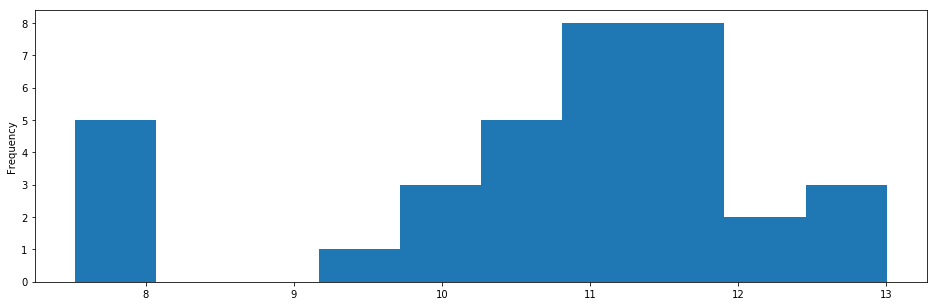

In [173]:
pd.Series(young[:, 833]).plot(kind='hist', figsize=(16,5))

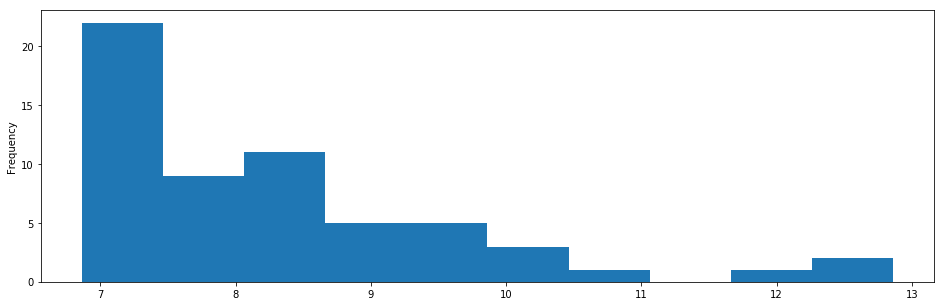

In [172]:
pd.Series(aged[:, 833]).plot(kind='hist', figsize=(16,5))

In [162]:
feat_det = len(np.nonzero(x[:,833]>9.5)[0])
print(feat_det)

39


In [163]:
age_det = len(np.nonzero(train_signs.age<=20)[0])
print(age_det)

35


In [164]:
age_match = len(set(np.nonzero(train_signs.age<=20)[0]) & set(np.nonzero(x[:,833]>9.5)[0]))
print(age_match)

30


In [165]:
fp_error = feat_det - age_match
fn_errpr = age_det - age_match

In [169]:
print(f'Age accuracy one feature: {100*(1 - (fp_error+fn_errpr)/len(train_signs))}')
print(f'Age accuracy all features: {100*np.mean(age_score)}')
print(f'Difference: {np.abs(100*np.mean(age_score) - 100*(1 - (fp_error+fn_errpr)/len(train_signs)))}')

Age accuracy one feature: 85.1063829787234
Age accuracy all features: 85.90476190476191
Difference: 0.7983789260385095
